In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import numpy as np
import json
from sklearn.feature_extraction.text import CountVectorizer as countVectorizer
%matplotlib inline

In [ ]:
encoding = 'ISO-8859-1'
col_names =['budget','genres','homepage','id','keywords','original_language','original_title','overview','popularity','production_companies','production_countries','release_date','revenue','runtime','spoken_languages','status','tagline','title','average','vote_count']
movies = pd.read_csv('/content/drive/MyDrive/ML_DATASET_CSE445/tmdb_5000_movies.csv',encoding = encoding)
credits= pd.read_csv('/content/drive/MyDrive/ML_DATASET_CSE445/tmdb_5000_credits.csv',encoding = encoding)



In [ ]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",12/10/2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800.0
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",5/19/2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500.0
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bonds past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",10/26/2015,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466.0
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.31295,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",7/16/2012,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106.0
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",3/7/2012,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124.0


In [ ]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
movies = movies.merge(credits, on='title', suffixes=('', '_credits'))
# Drop the `movie_id_x`, `cast_x`, and `crew_x` columns.
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4804 entries, 0 to 4803
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4804 non-null   object 
 1   genres                4804 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4804 non-null   object 
 4   keywords              4804 non-null   object 
 5   original_language     4804 non-null   object 
 6   original_title        4804 non-null   object 
 7   overview              4801 non-null   object 
 8   popularity            4804 non-null   object 
 9   production_companies  4804 non-null   object 
 10  production_countries  4804 non-null   object 
 11  release_date          4803 non-null   object 
 12  revenue               4804 non-null   object 
 13  runtime               4802 non-null   float64
 14  spoken_languages      4804 non-null   object 
 15  status               

In [ ]:


movies = movies[['movie_id','title','genres','keywords','cast','crew']]
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4804 entries, 0 to 4803
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4804 non-null   int64 
 1   title     4804 non-null   object
 2   genres    4804 non-null   object
 3   keywords  4804 non-null   object
 4   cast      4804 non-null   object
 5   crew      4804 non-null   object
dtypes: int64(1), object(5)
memory usage: 262.7+ KB


In [ ]:
movies.isnull().sum()

movie_id    0
title       0
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [ ]:
movies.dropna(inplace=True)
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4804 entries, 0 to 4803
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4804 non-null   int64 
 1   title     4804 non-null   object
 2   genres    4804 non-null   object
 3   keywords  4804 non-null   object
 4   cast      4804 non-null   object
 5   crew      4804 non-null   object
dtypes: int64(1), object(5)
memory usage: 262.7+ KB


In [ ]:
import ast
import json
#converting dictionary to list


def convert(text):
    L = []
    for i in ast.literal_eval(text):
        L.append(i['name'])
    return L



In [ ]:
movies['genres'] = movies['genres'].apply(convert)
movies.head()

,movie_id,title,genres,keywords,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
movies['keywords'] = movies['keywords'].apply(convert)
movies.head()

,movie_id,title,genres,keywords,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:

movies['cast'] = movies['cast'].apply(convert)
movies.head()


,movie_id,title,genres,keywords,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman, A...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
# Function to fetch director names
def fetch_director(text):
    L = []
    for i in ast.literal_eval(text):
        if i['job'] == 'Director':
            L.append(i['name'])
    return L

In [ ]:
#taking only directors as a crew
movies['crew'] = movies['crew'].apply(fetch_director)
movies.head()

,movie_id,title,genres,keywords,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski]
2,206647,Spectre,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",[Sam Mendes]
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman, A...",[Christopher Nolan]
4,49529,John Carter,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...",[Andrew Stanton]


In [ ]:
movies.head()

,movie_id,title,genres,keywords,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski]
2,206647,Spectre,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",[Sam Mendes]
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman, A...",[Christopher Nolan]
4,49529,John Carter,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...",[Andrew Stanton]


In [ ]:
#removing space
def collapse(L):
    L1 = [i.replace(" ", "") for i in L]
    return L1

In [ ]:
movies['cast'] = movies['cast'].apply(collapse)
movies['crew'] = movies['crew'].apply(collapse)
movies['genres'] = movies['genres'].apply(collapse)
movies['keywords'] = movies['keywords'].apply(collapse)
movies.head()

,movie_id,title,genres,keywords,cast,crew
0,19995,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",[GoreVerbinski]
2,206647,Spectre,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",[SamMendes]
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman, Anne...",[ChristopherNolan]
4,49529,John Carter,"[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...",[AndrewStanton]


In [ ]:
# movies['overview'] = movies['overview'].apply(lambda x: x.split())
# movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']
movies['tags'] =  movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']

In [ ]:
movies.head()

,movie_id,title,genres,keywords,cast,crew,tags
0,19995,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[JamesCameron],"[Action, Adventure, Fantasy, ScienceFiction, c..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",[GoreVerbinski],"[Adventure, Fantasy, Action, ocean, drugabuse,..."
2,206647,Spectre,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",[SamMendes],"[Action, Adventure, Crime, spy, basedonnovel, ..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman, Anne...",[ChristopherNolan],"[Action, Crime, Drama, Thriller, dccomics, cri..."
4,49529,John Carter,"[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...",[AndrewStanton],"[Action, Adventure, ScienceFiction, basedonnov..."


In [ ]:
# Combined the tags into a single string
movies['tags'] = movies['tags'].apply(lambda x: " ".join(x))
movies.head()

,movie_id,title,genres,keywords,cast,crew,tags
0,19995,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[JamesCameron],Action Adventure Fantasy ScienceFiction cultur...
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",[GoreVerbinski],Adventure Fantasy Action ocean drugabuse exoti...
2,206647,Spectre,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",[SamMendes],Action Adventure Crime spy basedonnovel secret...
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman, Anne...",[ChristopherNolan],Action Crime Drama Thriller dccomics crimefigh...
4,49529,John Carter,"[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...",[AndrewStanton],Action Adventure ScienceFiction basedonnovel m...


In [ ]:
# used CountVectorizer to convert text data to a numerical format
from sklearn.feature_extraction.text import TfidfVectorizer
# cv = countVectorizer(max_features=5000, stop_words='english')
# vector = cv.fit_transform(movies['tags']).toarray()
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
vector = tfidf.fit_transform(movies['tags']).toarray()


In [ ]:
# Appling K-means clustering
# Create a KMeans model
kmeans = KMeans(n_clusters=100,random_state=42,n_init=5)

# Fit the KMeans model to the vectorized movie data
kmeans.fit(vector)
kmeans
# Get the cluster labels for each movie
cluster_labels = kmeans.predict(vector)
#print('cluster_label {}',cluster_labels)


# Create a dictionary to map cluster labels to movie titles
cluster_to_movie_dict = {}
for i in range(len(movies)):
    cluster_label = cluster_labels[i]
    #print('cluster {}',cluster_label)
    movie_title = movies.iloc[i]['title']


    if cluster_label not in cluster_to_movie_dict:
        cluster_to_movie_dict[cluster_label] = []

    cluster_to_movie_dict[cluster_label].append(movie_title)
print(cluster_to_movie_dict)


{39: ['Avatar', 'Transformers: Age of Extinction', 'Star Trek Into Darkness', 'Edge of Tomorrow', 'Interstellar', 'Star Trek', 'Final Fantasy: The Spirits Within', 'Home', 'Prometheus', 'Oblivion', 'Gravity', 'Planet of the Apes', 'The Fifth Element', 'Mission to Mars', 'Independence Day', 'AVP: Alien vs. Predator', 'The X Files', 'Zathura: A Space Adventure', 'Alien: Resurrection', 'Planet 51', 'Meet Dave', 'Alien³', 'Race to Witch Mountain', 'K-PAX', 'Solaris', 'Escape from Planet Earth', 'Aliens vs Predator: Requiem', 'The Thing', 'Riddick', 'The Inhabited Island', "The Astronaut's Wife", 'District 9', 'Wing Commander', 'Aliens', 'Under the Skin', 'Earth to Echo', 'Attack the Block', '2001: A Space Odyssey', 'Alien', 'Stargate: The Ark of Truth', 'Galaxina', 'Apollo 18', 'Capricorn One', 'Cargo', 'Spaced Invaders', 'In the Shadow of the Moon', 'Independence Daysaster', 'Silent Running'], 87: ["Pirates of the Caribbean: At World's End", "Pirates of the Caribbean: Dead Man's Chest", '

In [ ]:


def recommend_movies(movie_title):
    """Recommends movies for the given movie title."""
    if movie_title not in movies['title'].values:
        print("Movie not found in the dataset.")
        return []

    # Get the cluster label for the given movie title.
    movie_index = movies[movies['title'] == movie_title].index[0]

    movie_cluster_label = cluster_labels[movie_index]


    # Get the recommended movies for the movie cluster.
    recommended_movies = cluster_to_movie_dict[movie_cluster_label]

    # Exclude the input movie from recommendations if it's in the cluster.
    if movie_title in recommended_movies:
        recommended_movies.remove(movie_title)

    for movie in recommended_movies[:5]:
       print(movie)


In [ ]:
#n = input("Enter the name of the movie:")
#recommended_movies = recommend_movies(n)


In [ ]:
recommended_movies = recommend_movies('Interstellar')



Avatar
Transformers: Age of Extinction
Star Trek Into Darkness
Edge of Tomorrow
Star Trek


In [ ]:
recommended_movies = recommend_movies('Titanic')

The Great Gatsby
Ghostbusters
Fun with Dick and Jane
How Do You Know
Knight and Day


In [ ]:
recommended_movies = recommend_movies('Spider-Man')

Avengers: Age of Ultron
The Avengers
Captain America: Civil War
Iron Man 3
The Amazing Spider-Man 2


In [ ]:
recommended_movies = recommend_movies('The Conjuring')

Harry Potter and the Order of the Phoenix
Harry Potter and the Goblet of Fire
Mission: Impossible II
Memoirs of a Geisha
Mighty Joe Young


In [ ]:
recommended_movies = recommend_movies('The Matrix')

TRON: Legacy
Terminator 3: Rise of the Machines
Terminator Genisys
The Matrix Revolutions
The Matrix Reloaded


In [ ]:
from sklearn.metrics import silhouette_score
k =100
silhouette_avg = silhouette_score(vector, kmeans.labels_)
print(f"The average silhouette_score for {k} clusters is: {silhouette_avg}")

The average silhouette_score for 100 clusters is: -0.007170693201393785


In [ ]:
best_score = -1
best_cluster = 0
for i in range(5,k+1,5):
  kmeans = KMeans(n_clusters=i,random_state=42,n_init=5)
  kmeans.fit(vector)
  silhouette_avg = silhouette_score(vector, kmeans.labels_)
  print(f"For n_clusters = {i}, the average silhouette_score is: {silhouette_avg}")

  if silhouette_avg > best_score:
         best_score = silhouette_avg
         best_cluster = i
print(f"The best number of clusters is {best_cluster} with a silhouette score of {best_score}")



For n_clusters = 5, the average silhouette_score is: 0.007763661166283861


KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt

# Initialize an empty list to store SSE values for each k
sse_values = []

# Define a range of k values to test
k_values = range(1, 20, 1)  # You can adjust the range as needed

# Calculate SSE for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=5, random_state=42)
    kmeans.fit(vector)
    sse_values.append(kmeans.inertia_)
    print(f"for k = {k} sse is {kmeans.inertia_}")

for k = 1 sse is 4730.946003153193
for k = 2 sse is 4706.645560839113
for k = 3 sse is 4690.083329296054
for k = 4 sse is 4661.439949600008
for k = 5 sse is 4648.628282739915
for k = 6 sse is 4630.39268718588
for k = 7 sse is 4618.607296006166
for k = 8 sse is 4609.64700592968
for k = 9 sse is 4600.509123561177
for k = 10 sse is 4590.716920427058
for k = 11 sse is 4580.021930746886
for k = 12 sse is 4570.52710671969
for k = 13 sse is 4566.116323802024
for k = 14 sse is 4567.2387970607
for k = 15 sse is 4555.362900557542
for k = 16 sse is 4555.067470763521
for k = 17 sse is 4548.940203227943
for k = 18 sse is 4541.8373886461795
for k = 19 sse is 4531.632273395747


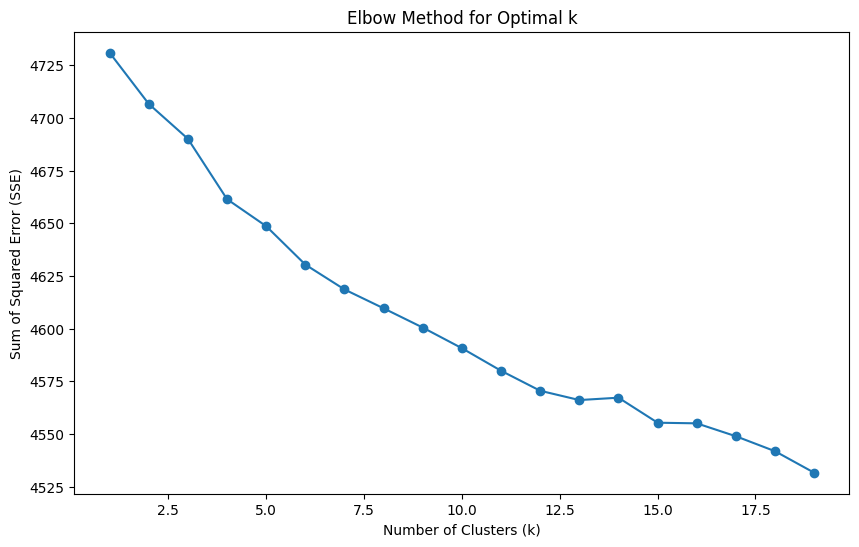

In [ ]:
# Plot the SSE values
plt.figure(figsize=(10, 6))
plt.plot(k_values, sse_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Error (SSE)')
plt.show()